Library

In [3]:
import pandas as pd
import numpy as np

import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras import layers, Sequential

import seaborn as sns
#from sklearn.preprocessing import Imputer

#from sklearn.impute import KNNImputer
#import nltk
#from nltk.tokenize import word_tokenize

In [4]:
train_data = pd.read_csv('train_data.csv')
train_data

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,2,117,1.0,4.0,3.0,NaN,5.0,2.0,9,19,...,3.0,13,9.0,15,3.0,NaN,13,3,1,0
2,3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,...,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,NaN,0.0,0,0.0,0.0,NaN,0,0,0
4,5,263,6.0,8.0,8.0,NaN,26.0,1.0,21,35,...,10.0,NaN,5.0,49,26.0,24.0,23,4,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,3616,131,2.0,1.0,9.0,27,4.0,0.0,6,13,...,10.0,2,0.0,10,2.0,3.0,4,1,3,1
3616,3617,7,0.0,0.0,1.0,0,0.0,0.0,2,2,...,0.0,0,1.0,1,0.0,1.0,1,1,0,0
3617,3618,3,0.0,0.0,NaN,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3618,3619,47,3.0,0.0,0.0,12,1.0,3.0,3,5,...,2.0,11,2.0,9,2.0,3.0,3,4,1,0


Data Preprocessing

In [5]:
train_data.isnull().sum()

id          0
word-1     11
word-2     16
word-3     14
word-4     23
word-5     24
word-6     23
word-7     20
word-8     21
word-9     34
word-10    20
word-11    18
word-12    20
word-13    23
word-14    13
word-15    24
word-16    11
word-17    20
word-18    20
word-19    34
word-20    14
word-21    11
word-22    10
word-23    15
word-24     9
word-25    17
word-26    13
word-27    10
word-28    11
word-29    16
word-30    17
word-31    11
word-32    10
word-33    18
word-34    11
word-35    19
word-36    13
word-37    14
word-38    12
word-39     6
word-40     2
Result      0
dtype: int64

In [6]:
#Fill missing value
#imputer = KNNImputer(n_neighbors=10, weights="uniform")
#train_data = pd.DataFrame(Imputer.fit_transform(train_data, ))
#train_data.head()
for column in train_data.columns[1:41]:
  train_data[column] = train_data[column].fillna(train_data[column].mode()[0])

In [7]:
train_data

,id,word-1,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,...,word-32,word-33,word-34,word-35,word-36,word-37,word-38,word-39,word-40,Result
0,1,5,0.0,0.0,0.0,0,0.0,0.0,1,0,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
1,2,117,1.0,4.0,3.0,0,5.0,2.0,9,19,...,3.0,13,9.0,15,3.0,0.0,13,3,1,0
2,3,30,1.0,1.0,5.0,8,3.0,2.0,2,2,...,1.0,5,1.0,1,1.0,0.0,0,0,0,0
3,4,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
4,5,263,6.0,8.0,8.0,0,26.0,1.0,21,35,...,10.0,0,5.0,49,26.0,24.0,23,4,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,3616,131,2.0,1.0,9.0,27,4.0,0.0,6,13,...,10.0,2,0.0,10,2.0,3.0,4,1,3,1
3616,3617,7,0.0,0.0,1.0,0,0.0,0.0,2,2,...,0.0,0,1.0,1,0.0,1.0,1,1,0,0
3617,3618,3,0.0,0.0,0.0,0,0.0,0.0,0,1,...,0.0,0,0.0,0,0.0,0.0,0,0,0,0
3618,3619,47,3.0,0.0,0.0,12,1.0,3.0,3,5,...,2.0,11,2.0,9,2.0,3.0,3,4,1,0


In [8]:
for column in train_data.columns[0:42]:
    train_data = train_data[pd.to_numeric(train_data[column], errors='coerce').notnull()]

In [9]:
train_data.isnull().sum()

id         0
word-1     0
word-2     0
word-3     0
word-4     0
word-5     0
word-6     0
word-7     0
word-8     0
word-9     0
word-10    0
word-11    0
word-12    0
word-13    0
word-14    0
word-15    0
word-16    0
word-17    0
word-18    0
word-19    0
word-20    0
word-21    0
word-22    0
word-23    0
word-24    0
word-25    0
word-26    0
word-27    0
word-28    0
word-29    0
word-30    0
word-31    0
word-32    0
word-33    0
word-34    0
word-35    0
word-36    0
word-37    0
word-38    0
word-39    0
word-40    0
Result     0
dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3580 entries, 0 to 3619
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3580 non-null   int64  
 1   word-1   3580 non-null   object 
 2   word-2   3580 non-null   float64
 3   word-3   3580 non-null   float64
 4   word-4   3580 non-null   float64
 5   word-5   3580 non-null   object 
 6   word-6   3580 non-null   float64
 7   word-7   3580 non-null   float64
 8   word-8   3580 non-null   object 
 9   word-9   3580 non-null   object 
 10  word-10  3580 non-null   object 
 11  word-11  3580 non-null   object 
 12  word-12  3580 non-null   float64
 13  word-13  3580 non-null   object 
 14  word-14  3580 non-null   object 
 15  word-15  3580 non-null   float64
 16  word-16  3580 non-null   float64
 17  word-17  3580 non-null   object 
 18  word-18  3580 non-null   object 
 19  word-19  3580 non-null   object 
 20  word-20  3580 non-null   float64
 21  word-21  3580 

In [11]:
train_data.columns[0:41]

Index(['id', 'word-1', 'word-2', 'word-3', 'word-4', 'word-5', 'word-6',
       'word-7', 'word-8', 'word-9', 'word-10', 'word-11', 'word-12',
       'word-13', 'word-14', 'word-15', 'word-16', 'word-17', 'word-18',
       'word-19', 'word-20', 'word-21', 'word-22', 'word-23', 'word-24',
       'word-25', 'word-26', 'word-27', 'word-28', 'word-29', 'word-30',
       'word-31', 'word-32', 'word-33', 'word-34', 'word-35', 'word-36',
       'word-37', 'word-38', 'word-39', 'word-40'],
      dtype='object')

Normalisasi

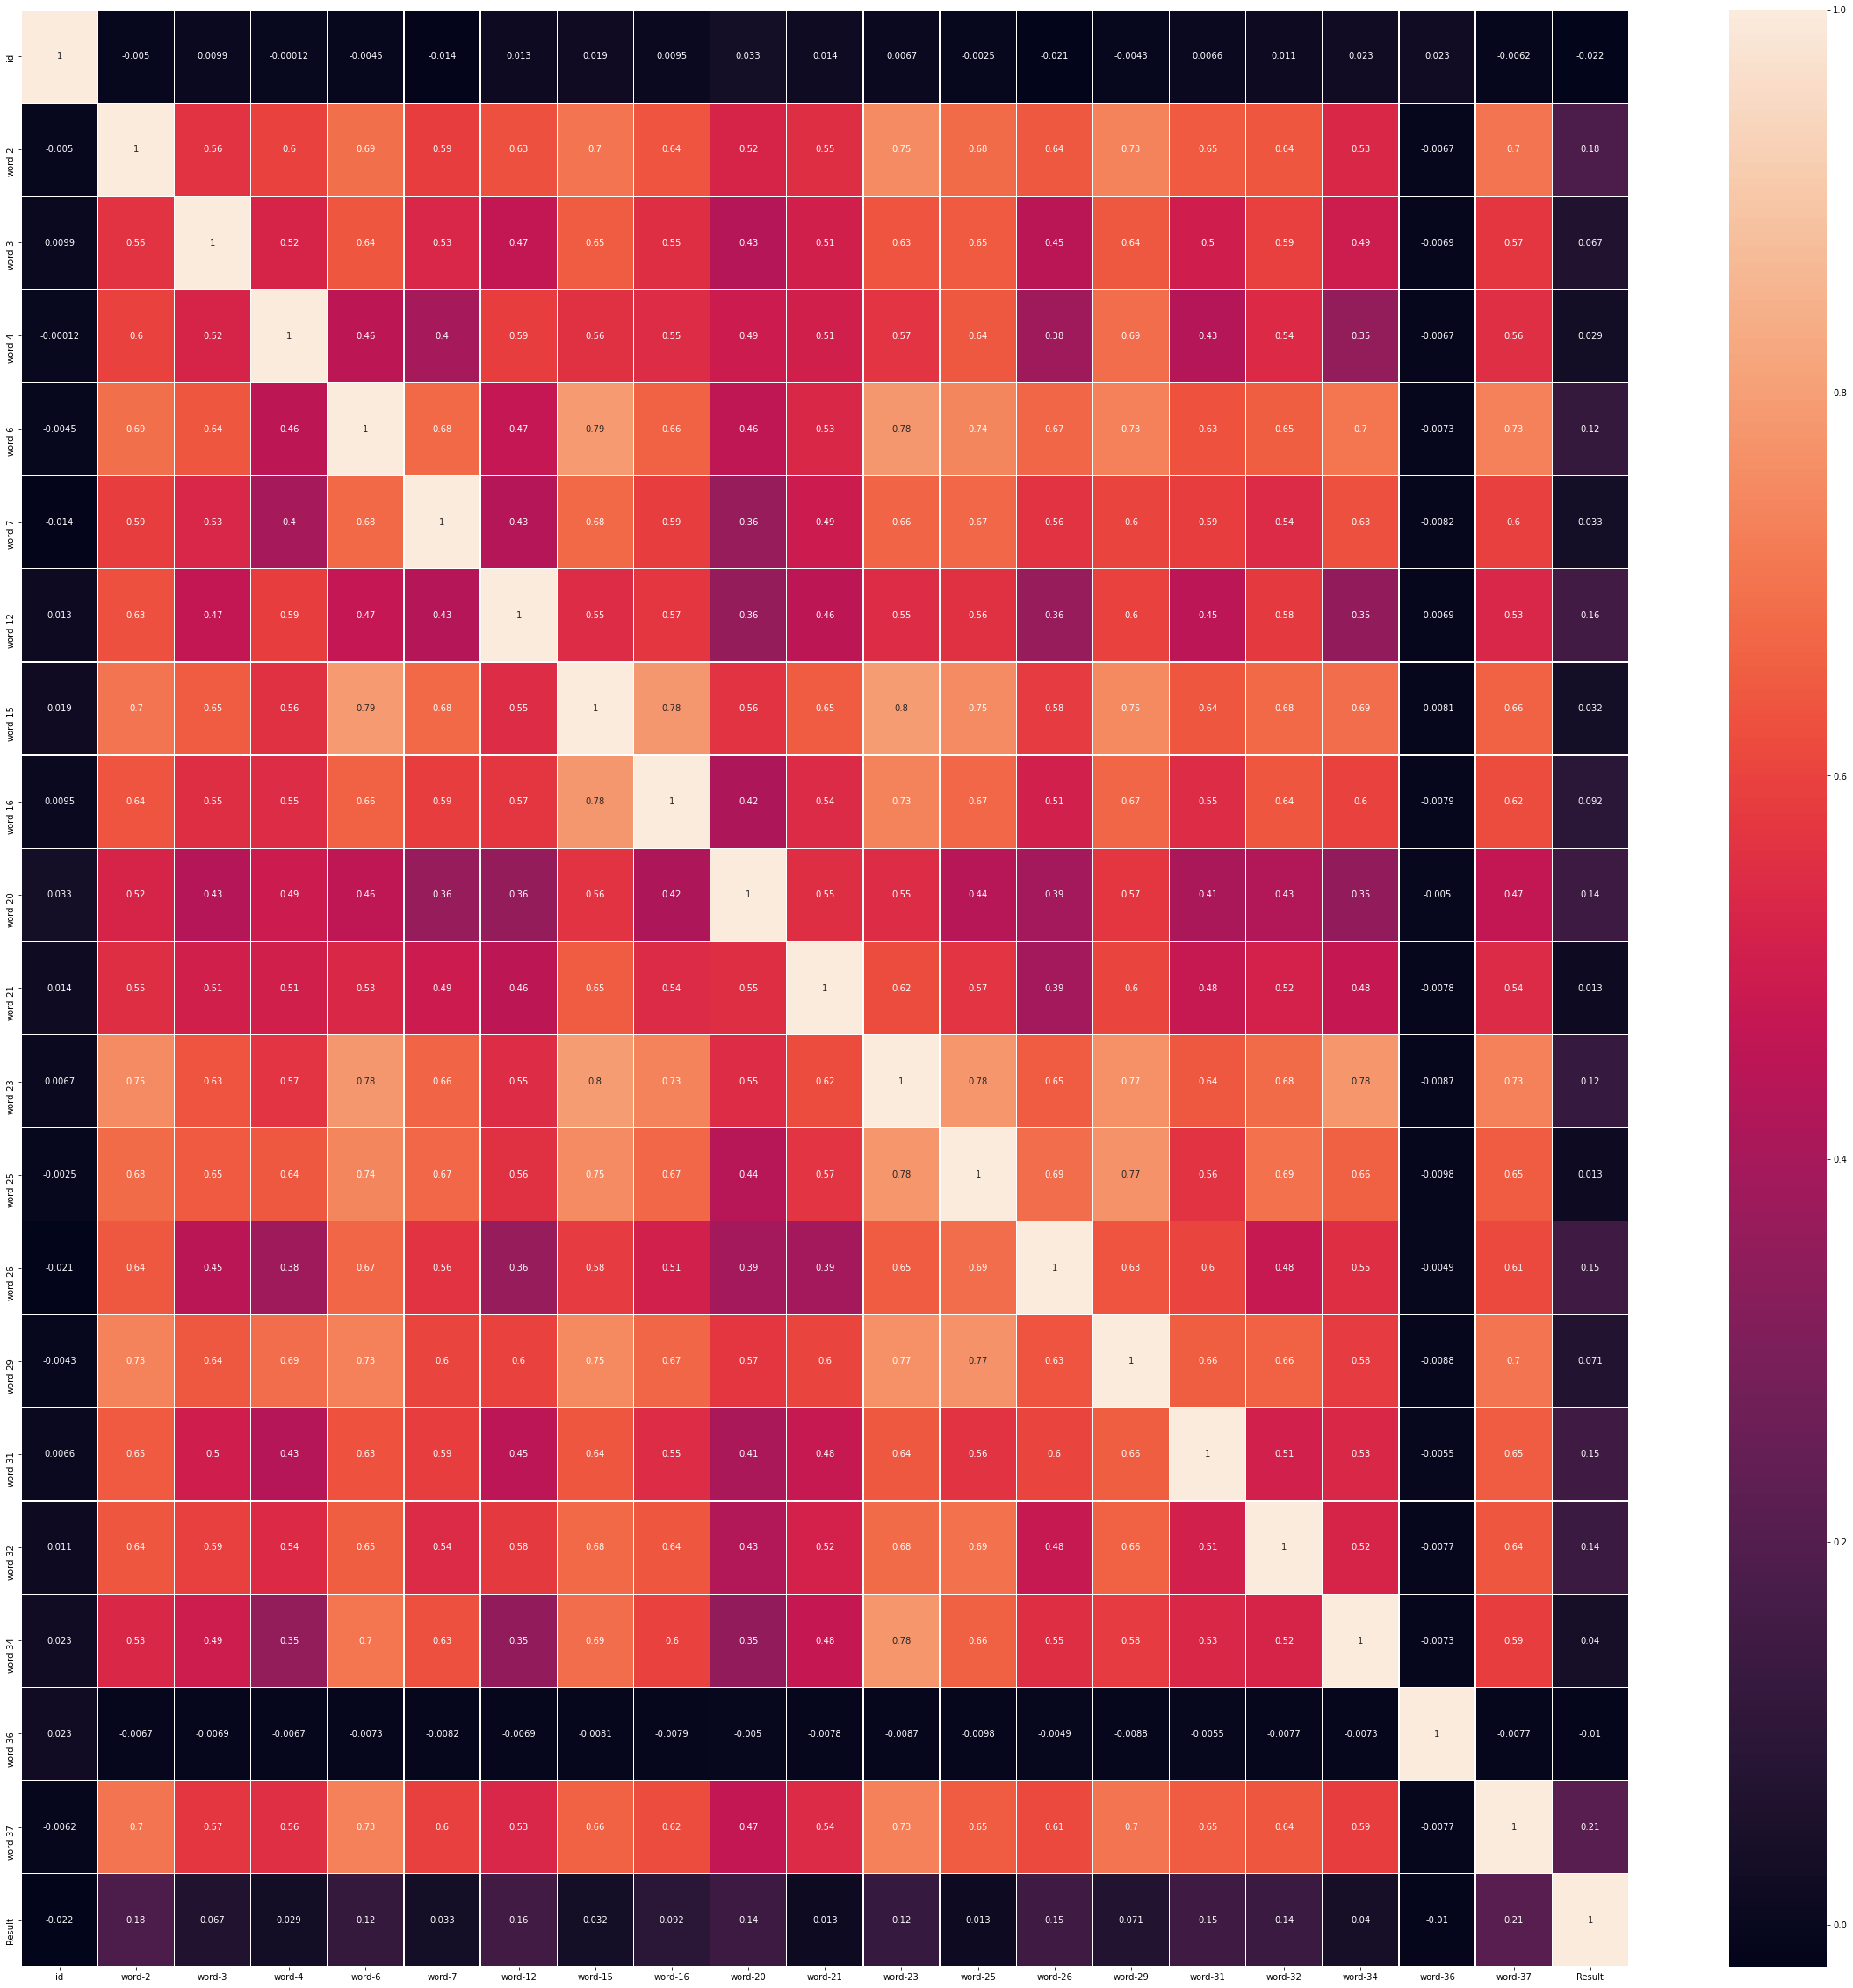

In [12]:
plt.figure(figsize = (41,41))
ax = sns.heatmap(train_data.corr(), annot=True, linewidths=.3)

Allocate features and label

In [13]:
train_features = train_data.drop(["id","word-1","word-36","word-40","Result"], axis=1)
train_label = train_data["Result"]

In [14]:
train_features.head()

,word-2,word-3,word-4,word-5,word-6,word-7,word-8,word-9,word-10,word-11,...,word-29,word-30,word-31,word-32,word-33,word-34,word-35,word-37,word-38,word-39
0,0.0,0.0,0.0,0,0.0,0.0,1,0,1,1,...,1.0,0,0.0,0.0,0,0.0,0,0.0,0,0
1,1.0,4.0,3.0,0,5.0,2.0,9,19,6,1,...,0.0,2,1.0,3.0,13,9.0,15,0.0,13,3
2,1.0,1.0,5.0,8,3.0,2.0,2,2,1,1,...,2.0,0,0.0,1.0,5,1.0,1,0.0,0,0
3,0.0,0.0,0.0,0,0.0,0.0,0,1,0,0,...,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0
4,6.0,8.0,8.0,0,26.0,1.0,21,35,10,5,...,56.0,20,6.0,10.0,0,5.0,49,24.0,23,4


In [15]:
train_label.head()

0    0
1    0
2    0
3    0
4    1
Name: Result, dtype: int64

In [16]:
X_train, X_test , Y_train, Y_test = train_test_split(train_features,train_label, test_size= 0.3, random_state = None)

<h1> Model Random Forest Classifier

In [17]:
clf = RandomForestClassifier(n_jobs=10, random_state=0)

In [18]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
Y_pred = clf.predict(X_test)

In [20]:
accuracy_score(Y_test, Y_pred)

0.8808193668528864

In [22]:
test= pd.read_csv("data/test_data.csv")